<h2 style="color:black" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

# Linear Regression

# Overview

Linear regression is a foundational algorithm in machine learning,
used for predicting a continuous variable.

# Learning Objectives
- Understand the theory behind linear regression.
- Learn to implement linear regression in Python.

# Practice Questions
1. Implement linear regression to predict housing prices using a
given dataset.
2. How would you evaluate the performance of your linear
regression model?

# Equation: 
Linear Regression tries to find the best straight line:

                            𝑦 = 𝑚𝑋+𝑏                        
Where:
- m = slope (how much y changes when X increases by 1)
- b = intercept (value of y when X = 0)



# What Does the Model Do?
- The model learns the best values of m and b
- by minimizing the prediction error using a method called:
    - Least Squares (MSE minimization)
        - This means the model tries to make predictions as close as possible to real values.

# What Do We Use It For?
Linear Regression is used in:
    ✔ Predicting scores
    ✔ Forecasting sales
    ✔ Estimating house prices
    ✔ Predicting salaries
    ✔ Financial trends
    
# Example
- If we train a model on:
    - Hours studied → Exam score
- It learns:
    - More hours → Higher score
    - A straight line that best represents the data
- Then it can predict the score from any new number of hours.

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.metrics import mean_squared_error, r2_score # For model evaluation
import joblib # For saving the model

# 1. Load and Prepare Data
# Read the file (ensure homeprices.csv is in the same directory)

In [39]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2503,557608
1,2521,558048
2,2528,536486
3,2548,553199
4,2552,532352


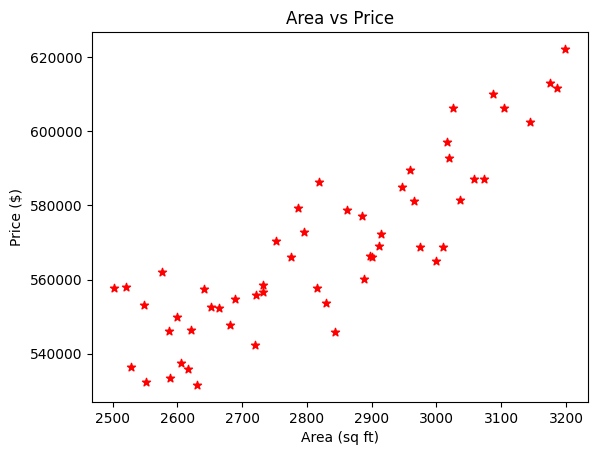

In [53]:
#plt.figure(figsize=(8,5))
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title("Area vs Price")

plt.scatter(df['area'], df['price'], color='red', marker='*')

plt.show()

# Separate data into features (X) and target (y)

In [54]:
X = df.drop('price', axis='columns')  # Area (Features)
y = df.price                          # Price (Target)


X.head()

,area
0,2503
1,2521
2,2528
3,2548
4,2552


In [42]:
price = df.price
y.head()

0    557608
1    558048
2    536486
3    553199
4    532352
Name: price, dtype: int64

# 2. Split Data (New Addition)
- Split data: 80% for training and 20% for testing
- random_state=42 ensures consistent splits across runs

In [55]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Model

In [56]:
# Create linear regression object
reg = linear_model.LinearRegression()
#reg.fit(new_df,price)

# Train the model using only the training data

In [57]:
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 4. Evaluate Model Performance (New Addition)

In [59]:
# Make predictions on the test set (unseen data)
y_pred = reg.predict(X_test)

In [61]:
# Model Evaluation Report
print("Model Evaluation Report: ")
print(f"Coefficient (m): {reg.coef_[0]:.2f}")
print(f"Intercept (b): {reg.intercept_:.2f}")
print(f"Equation: y = {reg.coef_[0]:.2f} * x + {reg.intercept_:.2f}")

Model Evaluation Report: 
Coefficient (m): 99.28
Intercept (b): 287822.79
Equation: y = 99.28 * x + 287822.79


In [62]:
# Calculate Error and Accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}") # Closer to 1.0 is better

Mean Squared Error (MSE): 170209597.05
R2 Score: 0.71


# 5. Manual Prediction (As in original file)

In [63]:
#  Predict price for 3300 and 5000 sq ft homes
price_3300 = reg.predict(pd.DataFrame({'area':[3300]}))
print(price_3300)
price_5000 = reg.predict(pd.DataFrame({'area':[5000]}))
print(price_5000)

[615450.72250063]
[784228.74577945]


# 6. Visualization (Enhanced: Points + Line)

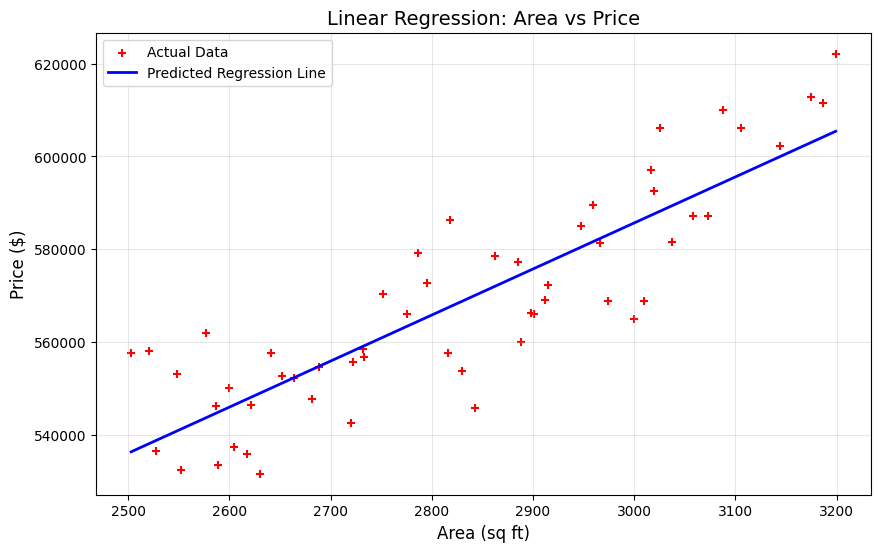

In [64]:
plt.figure(figsize=(10, 6))

# Plot actual data as red crosses
plt.scatter(df['area'], df['price'], color='red', marker='+', label='Actual Data')

# Plot the Best Fit Line in blue
# Use the model to predict prices for all areas to draw the line
plt.plot(df['area'], reg.predict(X), color='blue', linewidth=2, label='Predicted Regression Line')

plt.xlabel('Area (sq ft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Linear Regression: Area vs Price', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 7. Save the Model (New Addition)

In [65]:
# Save the model to a file for later use without retraining
joblib.dump(reg, 'my_linear_model.pkl')
print("\nModel saved successfully to 'my_linear_model.pkl'")


Model saved successfully to 'my_linear_model.pkl'


# Other Features

**(1) Predict price of a home with area = 3300 sqr ft**

In [27]:
import pandas as pd

reg.predict(pd.DataFrame({'area':[3300]}))

array([616088.3547031])

In [28]:
reg.coef_

array([100.64628578])

In [29]:
reg.intercept_

283955.6116169376

**Y = m * X + b (m is coefficient and b is intercept)**

In [30]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [32]:
#reg.predict([[5000]])

reg.predict(pd.DataFrame({'area':[5000]}))

array([787187.04053536])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [33]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [34]:
p = reg.predict(area_df)
p

array([ 384601.89740062,  434925.04029246,  515442.06891941,
        640243.46329118,  698618.30904572,  742902.67479054,
        836503.72056937,  632191.76042849,  762025.46908944,
        515442.06891941, 1189772.1836701 , 1149513.66935663,
        998544.2406811 ])

In [66]:
area_df['prices'] = p
area_df.head

<bound method NDFrame.head of     area        prices
0   1000  3.846019e+05
1   1500  4.349250e+05
2   2300  5.154421e+05
3   3540  6.402435e+05
4   4120  6.986183e+05
5   4560  7.429027e+05
6   5490  8.365037e+05
7   3460  6.321918e+05
8   4750  7.620255e+05
9   2300  5.154421e+05
10  9000  1.189772e+06
11  8600  1.149514e+06
12  7100  9.985442e+05>

In [67]:
area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2025. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442